In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("data.csv")

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

In [4]:
df=df.drop(['id'],axis=1)

In [5]:
df['diagnosis'] = df['diagnosis'].replace("M", 1) 
df['diagnosis'] = df['diagnosis'].replace("B", 0)

In [6]:
df['radius_mean']=df['radius_mean'].fillna(df['radius_mean'].median())
df['area_mean']=df['area_mean'].fillna(df['area_mean'].median())

In [7]:
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave_points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_sd                  0
texture_sd                 0
perimeter_sd               0
area_sd                    0
smoothness_sd              0
compactness_sd             0
concavity_sd               0
concave_points_sd          0
symmetry_sd                0
fractal_dimension_sd       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave_points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [8]:
X = df.iloc[:, 0:2].values
y = df.iloc[:, 2].values

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [11]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_


In [12]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)

In [13]:
from sklearn import preprocessing
from sklearn import utils
lab = preprocessing.LabelEncoder()
y_transformed = lab.fit_transform(y)
print(y_transformed)

[  1 186 324 297  60 107 282 313 349 407 391 189 418 403 378 451 287 306
 364  61 108  16  59 384 330 133 336 293 432  85 426 229 405 440 188 341
 345 216 429 312 340 328 419 295 348 179 146 227  66 368 342 130 208 229
 358 230 222 341 253   8  77 316 364  47 399 402 319 243 168 135 327  67
 413 111 136 269   6 123 404 194 315 114 421 439 102 220 333 415 347  91
 406 381  73 210 276 383 187 279  20 274 422  40 299 259 252  99 212 221
 271 325 151 310 269 289 113 336 110 140 382 283   3 157 290   4 132 162
 417 239 132 427  36 261 337  49 354 373 140  93 178  39  10 197 167 117
  82  68 138 231  89 190 311 307  92  27  92 193 309 260  18  24 288 118
 202 365 359 273   0 232 416 150  15 268   9  71  88  64 198 286 365  26
 351 441 296  78 371  87 223 160 171 115 387 331 207 445 389 129 367 350
 374 292 264 254 443 396 225 141 165 294 376  23 363 240 218 436 398 148
 213 174 338 475  31  48 176 293 153  42  95  98 404 369 245 449 477 453
 116 324 446 333 454 478 100  84 206 397 394 277 17

In [14]:
classifier = LogisticRegression()
classifier.fit(X, y_transformed)

C:\Users\91790\New folder (8)\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [15]:
y_pred = classifier.predict(X_test)

In [16]:
from matplotlib.colors import ListedColormap


In [17]:
scaled_data=preprocessing.scale(df.T)

In [18]:
pca=PCA()
pca.fit(scaled_data)
pca_data=pca.transform(scaled_data)

In [19]:
pca_data

array([[-7.64984777e+00, -2.34073822e-01, -3.19487333e-01,
        -9.86635264e-02, -2.13440141e-02,  1.45066532e-02,
        -2.21560141e-03, -8.32429749e-03, -4.30730814e-03,
        -9.48495721e-03, -9.28021148e-03,  3.32419736e-02,
        -2.76415697e-03, -5.29401795e-04,  1.03972040e-05,
        -8.08227669e-05, -1.15698546e-04,  3.93485151e-05,
        -6.93394634e-05,  6.68626100e-06,  2.67867574e-05,
        -1.59227652e-05,  1.24000765e-05, -1.86790569e-06,
        -2.01483444e-06, -2.18439121e-08, -9.80496517e-08,
         2.57876464e-07, -1.13535742e-07, -1.04591614e-07,
        -1.02851755e-14],
       [-5.61269242e+00,  9.29301285e-02,  1.75489857e-01,
        -7.85622134e-02, -8.07850854e-02, -6.44767638e-02,
        -8.50330691e-03,  1.32437275e-01,  1.65935551e-03,
        -1.10257026e-02, -2.45843785e-03, -8.11220541e-05,
         6.26529968e-04,  1.44319542e-05, -6.20509174e-05,
         9.34994181e-06,  1.18845426e-05,  5.73261547e-06,
        -8.18309808e-07, -5.06

In [20]:
per_var=np.round(pca.explained_variance_ratio_*100,decimals=1)
labels=['PC'+str(x) for x in range(1,len(per_var)+1)]

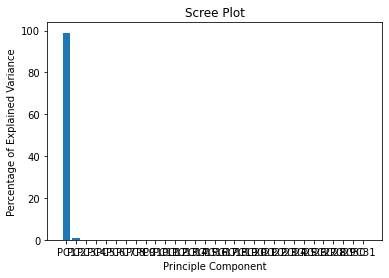

In [21]:
plt.bar(x=range(1,len(per_var)+1),height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principle Component')
plt.title('Scree Plot')
plt.show()

#### the scree plot shows that the percentage of explained varience is high(more than 95%), it shows that it presrves more than 95% of the data in the main dataset.

#### Principle Component Analysis helps to simplify the complexity of data but retains the patterns. It is helpful to understand the trends of the data and to interprt accordingly.